1. PERSIAPAN
- Melakukan proses import
- Membaca keselurhan data di Folder
- Menambahkan kolom nama saham pada .csv

In [13]:
# 1. PERSIAPAN
#Persiapan Awal
import pandas as pd
import os #Pyhton 3.11.0

#Membaca data .csv di folder
folder_path = 'Stock'
all_files = [f for f in os.listdir('C:/Users/tunzi/OneDrive/Dokumen/GitHub/stock_portofolio/Stock') if f.endswith('.csv')]

#Menambahkan kolom nama saham pada .csv
df_list = []
for file in all_files:
    stock_df = pd.read_csv(os.path.join('C:/Users/tunzi/OneDrive/Dokumen/GitHub/stock_portofolio/Stock', file))
    stock_df['Stock'] = file.replace('.csv', '')  # Tambahkan kolom nama saham
    df_list.append(stock_df)

df_all = pd.concat(df_list)
#Mengecek penambahan kolom stock
print(f"File: {file}")
print("Header:", list(df_all.columns))
print("-" * 40)

File: WSKT.JK.csv
Header: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'stock', 'Stock']
----------------------------------------


2. PEMBERSIHAN DATA
- Melakukan pembersihan data dan mengidentifikasi kolom-kolom penting

In [ ]:
#Memastikan kolom-kolom penting ada dan bersih
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all[['Date', 'Close', 'Stock']].dropna()


In [ ]:
#Mengecek seberapa banyak NULL setelah dilakukan pembersihan
print(df_all.isnull().sum())

Date     0
Close    0
Stock    0
dtype: int64


3. PREPROCESSING DATA
- Melakukan pengurutan data berdasarkan tanggal dan menghilangkan duplikat

In [18]:
df_all = df_all.sort_values(by=['Stock', 'Date']).drop_duplicates()

4. PERHITUNGAN
- Melakukan penentuan cut-off date (3 bulan terakhir, 1 tahun terakhir dan 5 tahun terakhir)
- Melakukan Perhitungan Return Profitabilitas menggunakan rumus:
Return = (Close Akhir/Close Awal)-1

In [19]:
#Penentuan cut-off date
from datetime import timedelta
from dateutil.relativedelta import relativedelta

last_date = df_all['Date'].max()
start_3mo = last_date - relativedelta(months=3)
start_1yr = last_date - relativedelta(years=1)
start_5yr = last_date - relativedelta(years=5)


In [ ]:
#Menghitung Return
#Rumusnya return = (Close_terakhir / Close_awal) - 1

#Perhitungan Profit untuk 3 Bulan terakhir, 1 Tahun Terakhir dan 5 Tahun Terakhir
def calculate_return(df, start_date, end_date):
    result = []
    for stock in df['Stock'].unique():
        stock_data = df[df['Stock'] == stock]
        stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)]
        
        if not stock_data.empty:
            first = stock_data.sort_values('Date').iloc[0]['Close']
            last = stock_data.sort_values('Date').iloc[-1]['Close']
            ret = (last / first) - 1
            result.append({'Stock': stock, 'Return': ret})
    return pd.DataFrame(result).sort_values(by='Return', ascending=False)

top_3mo = calculate_return(df_all, start_3mo, last_date)
top_1yr = calculate_return(df_all, start_1yr, last_date)
top_5yr = calculate_return(df_all, start_5yr, last_date)

print("Top 3 Months Profit:")
print(top_3mo.head(1))

print("\nTop 1 Year Profit:")
print(top_1yr.head(1))

print("\nTop 5 Years Profit:")
print(top_5yr.head(1))


Top 3 Months Profit:
   Stock  Return
30  PGAS    0.65

Top 1 Year Profit:
      Stock    Return
13  BUMI.JK  2.647059

Top 5 Years Profit:
      Stock    Return
44  WSKT.JK  3.829873


- Analisis keamanan untuk 5 tahun

In [23]:
def return_std_dev(df, start_date, end_date):
    result = []
    for stock in df['Stock'].unique():
        stock_data = df[df['Stock'] == stock]
        stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)]
        stock_data = stock_data.sort_values('Date')

        if len(stock_data) > 2:
            stock_data['Daily Return'] = stock_data['Close'].pct_change()
            avg_return = (stock_data['Close'].iloc[-1] / stock_data['Close'].iloc[0]) - 1
            volatility = stock_data['Daily Return'].std()
            result.append({'Stock': stock, 'Return': avg_return, 'Volatility': volatility})
    return pd.DataFrame(result).sort_values(by=['Return', 'Volatility'], ascending=[False, True])

safe_5yr = return_std_dev(df_all, start_5yr, last_date)

print("\nTop 5 Years Profit + Safety:")
print(safe_5yr.head(1))


Top 5 Years Profit + Safety:
      Stock    Return  Volatility
44  WSKT.JK  3.829873    0.025466


KESIMPULAN

Berdasarkan data yang didapat dan telah dikerjakan, maka dapat disimpulkan sebagai berikut:

In [24]:
print("\nThe most profitable stock for 3 month:")
print(top_3mo.head(1))

print("\nThe most profitable stock for 1 year:")
print(top_1yr.head(1))

print("\nThe most profitable and safest stock for 5 year:")
print(safe_5yr.head(1))


The most profitable stock for 3 month:
   Stock  Return
30  PGAS    0.65

The most profitable stock for 1 year:
      Stock    Return
13  BUMI.JK  2.647059

The most profitable and safest stock for 5 year:
      Stock    Return  Volatility
44  WSKT.JK  3.829873    0.025466


Stock dengan nama PGAS memliki return sebesar 6.5% (Selama 3 bulan)

Stock dengan nama BUMI.JK memliki return sebesar 26.47% (Selama 1 tahun)

Stock dengan nama WSKT.JK memliki return sebesar 38.29% dan merupakan stock teraman (Selama 5 tahun)

------------------------------------------

VISUALISASI SAHAM

PGAS Return 6.5% (Saham terprofit selama 3 bulan)

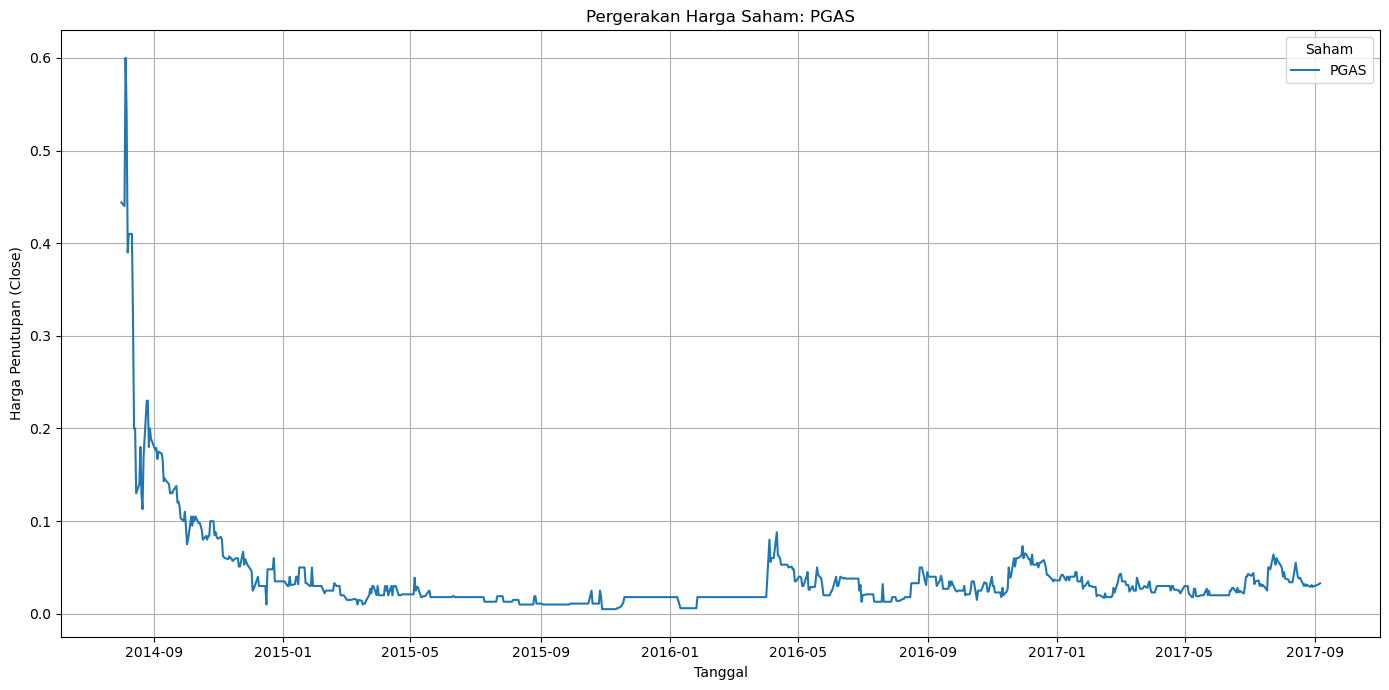

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 1. Lokasi folder berisi file CSV
folder_path = 'Stock'

# 2. Buat list untuk gabungkan semua data
data_list = []

# 3. Loop semua file di folder
for file in os.listdir('C:/Users/tunzi/OneDrive/Dokumen/GitHub/stock_portofolio/Stock'):
    if file.endswith('.csv'):
        stock_name = file.replace('.csv', '')  # Ambil nama file tanpa .csv
        if stock_name in ['PGAS']:  # Filter hanya 3 saham ini
            df = pd.read_csv(os.path.join('C:/Users/tunzi/OneDrive/Dokumen/GitHub/stock_portofolio/Stock', file))
            df['Stock'] = stock_name  # Tambahkan kolom STOCK
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df = df.dropna(subset=['Date', 'Close'])
            data_list.append(df)

# 4. Gabungkan semua ke satu DataFrame
df_all = pd.concat(data_list, ignore_index=True)

# 5. Urutkan berdasarkan tanggal
df_all = df_all.sort_values(by='Date')

# 6. Visualisasikan
plt.figure(figsize=(14, 7))

for stock in df_all['Stock'].unique():
    subset = df_all[df_all['Stock'] == stock]
    plt.plot(subset['Date'], subset['Close'], label=stock)

plt.title('Pergerakan Harga Saham: PGAS')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (Close)')
plt.legend(title='Saham')
plt.grid(True)
plt.tight_layout()
plt.show()


BUMI.JK Return 26.47% (Saham terprofit selama 1 tahun)

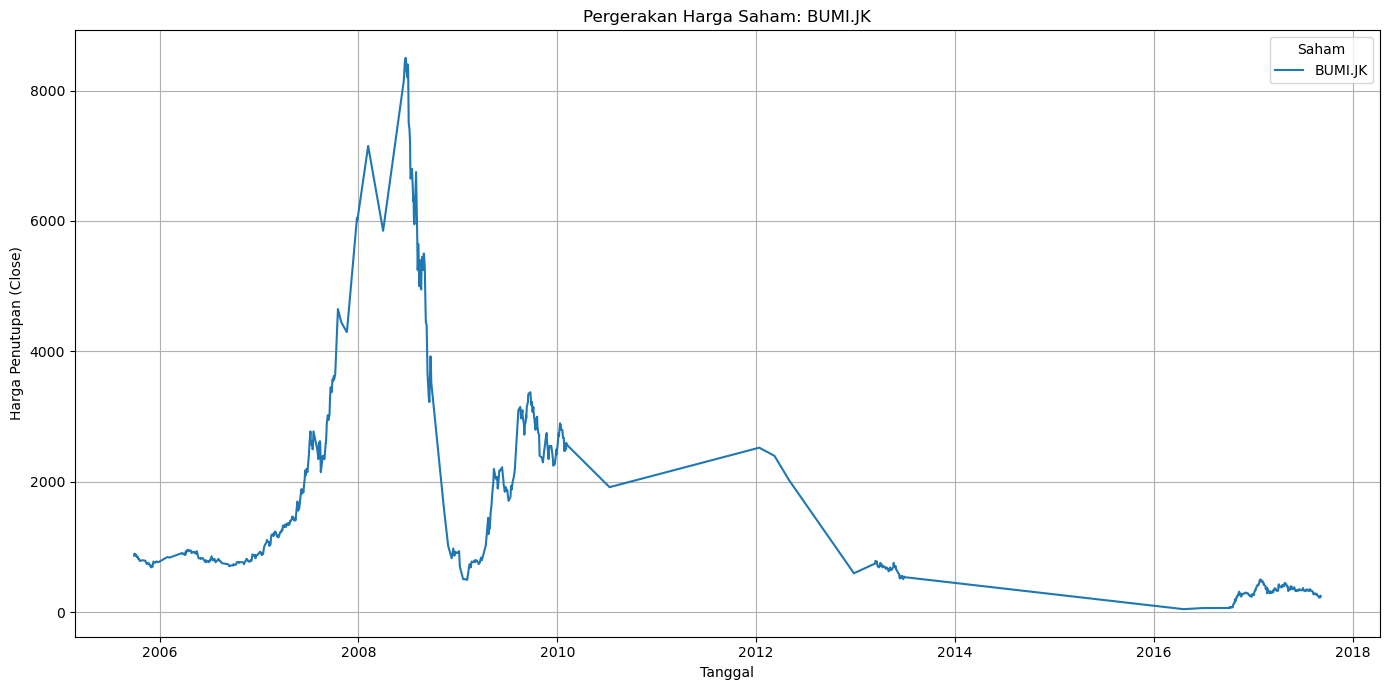

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 1. Lokasi folder berisi file CSV
folder_path = 'Stock'

# 2. Buat list untuk gabungkan semua data
data_list = []

# 3. Loop semua file di folder
for file in os.listdir('C:/Users/tunzi/OneDrive/Dokumen/GitHub/stock_portofolio/Stock'):
    if file.endswith('.csv'):
        stock_name = file.replace('.csv', '')  # Ambil nama file tanpa .csv
        if stock_name in ['BUMI.JK']:  # Filter hanya 3 saham ini
            df = pd.read_csv(os.path.join('C:/Users/tunzi/OneDrive/Dokumen/GitHub/stock_portofolio/Stock', file))
            df['Stock'] = stock_name  # Tambahkan kolom STOCK
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df = df.dropna(subset=['Date', 'Close'])
            data_list.append(df)

# 4. Gabungkan semua ke satu DataFrame
df_all = pd.concat(data_list, ignore_index=True)

# 5. Urutkan berdasarkan tanggal
df_all = df_all.sort_values(by='Date')

# 6. Visualisasikan
plt.figure(figsize=(14, 7))

for stock in df_all['Stock'].unique():
    subset = df_all[df_all['Stock'] == stock]
    plt.plot(subset['Date'], subset['Close'], label=stock)

plt.title('Pergerakan Harga Saham: BUMI.JK')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (Close)')
plt.legend(title='Saham')
plt.grid(True)
plt.tight_layout()
plt.show()


WSKT.JK Return 38.29% (Saham terprofit dan teraman selama 5 tahun)

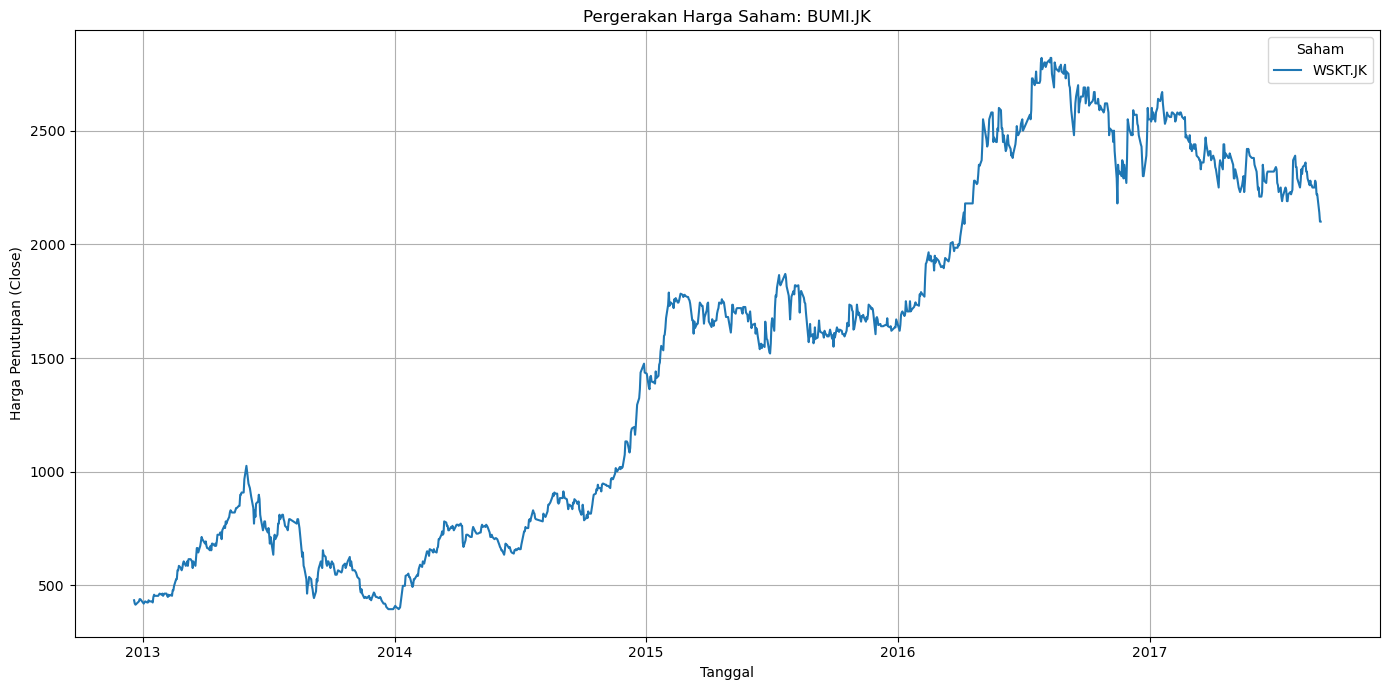

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 1. Lokasi folder berisi file CSV
folder_path = 'Stock'

# 2. Buat list untuk gabungkan semua data
data_list = []

# 3. Loop semua file di folder
for file in os.listdir('C:/Users/tunzi/OneDrive/Dokumen/GitHub/stock_portofolio/Stock'):
    if file.endswith('.csv'):
        stock_name = file.replace('.csv', '')  # Ambil nama file tanpa .csv
        if stock_name in ['WSKT.JK']:  # Filter hanya 3 saham ini
            df = pd.read_csv(os.path.join('C:/Users/tunzi/OneDrive/Dokumen/GitHub/stock_portofolio/Stock', file))
            df['Stock'] = stock_name  # Tambahkan kolom STOCK
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df = df.dropna(subset=['Date', 'Close'])
            data_list.append(df)

# 4. Gabungkan semua ke satu DataFrame
df_all = pd.concat(data_list, ignore_index=True)

# 5. Urutkan berdasarkan tanggal
df_all = df_all.sort_values(by='Date')

# 6. Visualisasikan
plt.figure(figsize=(14, 7))

for stock in df_all['Stock'].unique():
    subset = df_all[df_all['Stock'] == stock]
    plt.plot(subset['Date'], subset['Close'], label=stock)

plt.title('Pergerakan Harga Saham: BUMI.JK')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (Close)')
plt.legend(title='Saham')
plt.grid(True)
plt.tight_layout()
plt.show()


Demikian pengerjaan tugas saya kerjakan dengan pemahaman saya dan pembelajaran secara singkat. Semoga menjawab pertanyaan pihak Ibu/Bapak atas kemampuan saya untuk mengisi posisi Data Sciencest. Terima Kasih Banyak

Tunzira Abrar